# A/B Hypothesis Testing

In this project I take on the role of a data analyst at a big online store. My goal here is to assess a list of hypotheses that may help boost revenue by utilizing A/B testing. 

**Action Plan**

The first step will be to prioritize hypotheses using the ICE and RICE frameworks to organize the hypotheses from highest to lowest priority.

After prioritizing the hypotheses I will begin Exploratory Data Analysis to examine and display the data before conducting a series of A/B tests to decide with hypotheses are viable and worth continuing with. 

I will preform the following operations:

- Graph cumulative revenue by group
- Graph cumulative avg order size by group
- Graph relative difference in cumulative order size
- Calculate conversion rate 
- Graph number of orders per user
- Calculate 95th and 99th percentiles of order prices
- Find statistical significance of conversion (raw data)
- Find statistical significance of order size (raw data)
- Find statistical significance of conversion (filtered data)
- Find statistical significance of order size (filtered data)
- Make final decision based on test results

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

## Prioritizing Hypotheses

In [2]:
# loading hypotheses dataset

try:
    hyp_df = pd.read_csv('datasets/hypotheses_us.csv', sep = ';')
except:
    hyp_df = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
    
hyp_df.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


#### Dataset Breakdown

- `Hypotheses`: brief descriptions of the hypotheses
- `Reach`: user reach, on a scale of one to ten
- `Impact`:impact on users, on a scale of one to ten
- `Confidence`: confidence in the hypothesis, on a scale of one to ten
- `Effort`: the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

In [3]:
# adding ICE column

hyp_df['ICE'] = (hyp_df['Impact'] * hyp_df['Confidence']) / hyp_df['Effort']
hyp_df['ICE'] = hyp_df['ICE'].round()

pd.options.display.max_colwidth = 210
hyp_df.sort_values('ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0


In [4]:
hyp_df['hyp_num'] = [1,2,3,4,5,6,7,8,9]
hyp_df.head()

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,hyp_num
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0,1
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,2
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0,4
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,5


Text(0.5, 0, 'Hypothesis')

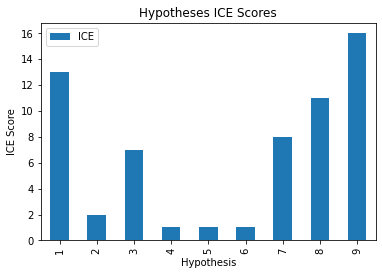

In [5]:
hyp_df.plot(kind = 'bar', x = 'hyp_num', y= 'ICE')
plt.title('Hypotheses ICE Scores')
plt.ylabel('ICE Score')
plt.xlabel('Hypothesis')

### ICE Priority

When the ICE framework is applied to `hyp_df` the hypotheses are sorted in the following order in descending priority.

**8, 0, 7, 6, 2, 1, 5, 3, 4**

In [6]:
# adding RICE column

hyp_df['RICE'] = (hyp_df['Reach'] * hyp_df['Impact'] * hyp_df['Confidence']) / hyp_df['Effort']
hyp_df['RICE'] = hyp_df['RICE'].round()

pd.options.display.max_colwidth = 210
hyp_df.sort_values('RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,hyp_num,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0,8,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,3,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0,1,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,7,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0,9,16.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0,4,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,2,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0,6,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,5,3.0


Text(0.5, 0, 'Hypothesis')

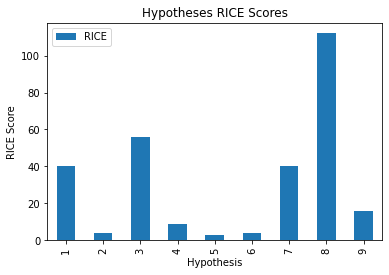

In [7]:
hyp_df.plot(kind = 'bar', x = 'hyp_num', y= 'RICE')
plt.title('Hypotheses RICE Scores')
plt.ylabel('RICE Score')
plt.xlabel('Hypothesis')

### RICE Priority

When the RICE framework is applied to `hyp_df` the hypotheses are sorted in the following order in descending priority.

**7, 2, 0, 6, 8, 3, 1, 5, 4**

### Conclusion

The ICE and RICE frameworks have one key difference, the inclusion of "reach". ICE only takes in to account existing customers and so works best when deciding on internal changes that are only intended to impact users already utilizing a platfrom. RICE, however, adds "reach" to its calculation and thus is best for externally-focused goals that are intended to attract new customers.

We can see that manifest in the top hypotheses for each framework. For ICE the top is 'Launch a promotion that gives users discounts on their birthdays' while for RICE it is 'Add a subscription form to all the main pages. This will help you compile a mailing list'. In both frameworks **hypothesis 0 'Add two new channels for attracting traffic. This will bring 30% more users'** scored very highly, indicating this may be a particularly useful avenue to pursue.

While is slightly difference orders, both frameworks have give lowest priority to hypotheses **1, 3, 4, and 5.**

## A/B Analysis

Now that the ICE and RICE frameworks have been applied to `hyp_df` I will import that two CSV datasets with the actual data for analysis. 

### Preprocessing Datasets

In [8]:
# loading orders dataset

try:
    orders_df = pd.read_csv('datasets/orders_us.csv')
except:
    orders_df = pd.read_csv('/datasets/orders_us.csv')

orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


#### Dataset Breakdown

- `transactionId`: order identifier
- `visitorId`: identifier of the user who placed the order
- `date`: of the order
- `revenue`: from the order
- `group`: the A/B test group that the user belongs to

In [9]:
# correcting `date` datatype

orders_df['date'] = pd.to_datetime(orders_df['date'], format = '%Y-%m-%d')

In [10]:
# loading visits dataset

try:
    visits_df = pd.read_csv('datasets/visits_us.csv')
except:
    visits_df = pd.read_csv('/datasets/visits_us.csv')

visits_df.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


#### Dataset Breakdown

- `date`: date
- `group`: A/B test group
- `visits`:the number of visits on the date specified in the A/B test group specified

In [11]:
# correcting `date` datatype

visits_df['date'] = pd.to_datetime(visits_df['date'], format = '%Y-%m-%d')

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [13]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
# removing any visitorIds that were included in both groups A and B

good_ids = orders_df.groupby(["visitorId"])["group"].value_counts().reset_index(name = 'count')
good_ids = good_ids.loc[good_ids["count"] == 1, "visitorId"]

orders_df = orders_df[orders_df["visitorId"].isin(good_ids)]

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1074 non-null   int64         
 1   visitorId      1074 non-null   int64         
 2   date           1074 non-null   datetime64[ns]
 3   revenue        1074 non-null   float64       
 4   group          1074 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 50.3+ KB


Now that we have removed any visitorIds that were mistakenly logged as both group A and group B we can move into the meat of our analysis. 

### Data Visualizations

In [15]:
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [16]:
# grouping cumulative data by date and group

dates_grouped = orders_df[['date','group']].drop_duplicates()

orders_aggregated = dates_grouped.apply(
    lambda x: orders_df[np.logical_and(orders_df['date'] <= x['date'], 
    orders_df['group'] == x['group'])]
    .agg({'date' : 'max','group' : 'max','transactionId' : pd.Series.nunique,'visitorId' : pd.Series.nunique,'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
    
orders_aggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,15,15,1427.4
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,31,31,2224.8
173,2019-08-02,B,42,41,4108.0
291,2019-08-03,A,55,55,4040.0


In [17]:
# splitting data in to each group

orders_agg_a = orders_aggregated[orders_aggregated['group']=='A'][['date','revenue', 'transactionId']]
orders_agg_b = orders_aggregated[orders_aggregated['group']=='B'][['date','revenue', 'transactionId']]

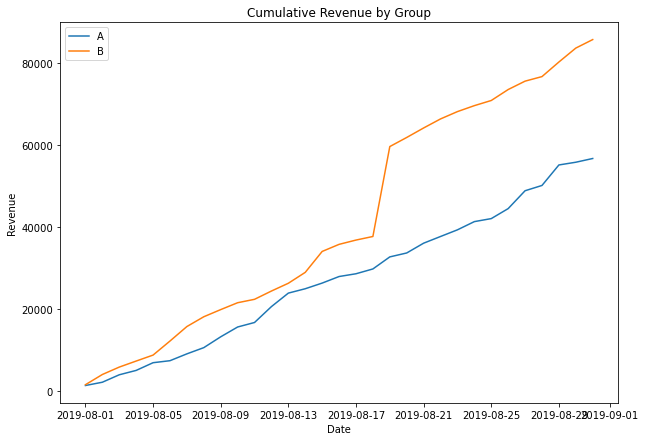

In [18]:
# graphing cumulative revenue

plt.figure(figsize = (10,7))
plt.plot(orders_agg_a['date'], orders_agg_a['revenue'], label = 'A')
plt.plot(orders_agg_b['date'], orders_agg_b['revenue'], label = 'B')
plt.title('Cumulative Revenue by Group')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend()

#### Conclusions

The first thing that pops out when looking at the above graph is the massive spike in cumulative revenue for group B around Aug 19. Other than is spike, both groups remain fairly conisiten in revenue growth. The huge spike in revenue from group B implies that something occured in that groups buying behavior that impacted that outcome. Assessing what may have occured on this day could be very helpful for increasing overall revenue. In general, group B had a slightly higher cumulative revenue than group A, even before the spike.

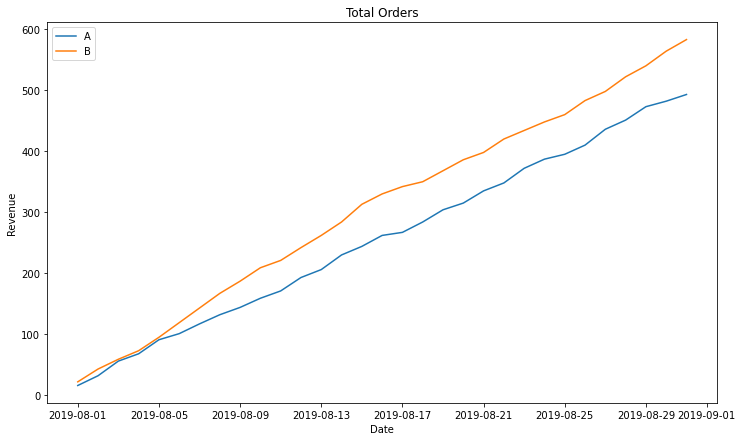

In [19]:
# graphing total orders

plt.figure(figsize = (12,7))
plt.plot(orders_agg_a['date'], orders_agg_a['transactionId'], label = 'A')
plt.plot(orders_agg_b['date'], orders_agg_b['transactionId'], label = 'B')
plt.title('Total Orders')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend()

#### Conclusions

Here we can see that both groups had very consistent cumulative total orders over the course of the month, though group B did have more orders overall than group A. Interestingly, there is no spike in group B's total orders around the August 19th, meaning that the spike in revenue was attributed to one order, not an increase in total orders.

In [20]:
orders_agg_a['cumulative_rev'] = orders_agg_a['revenue']/orders_agg_a['transactionId']
orders_agg_b['cumulative_rev'] = orders_agg_b['revenue']/orders_agg_b['transactionId']

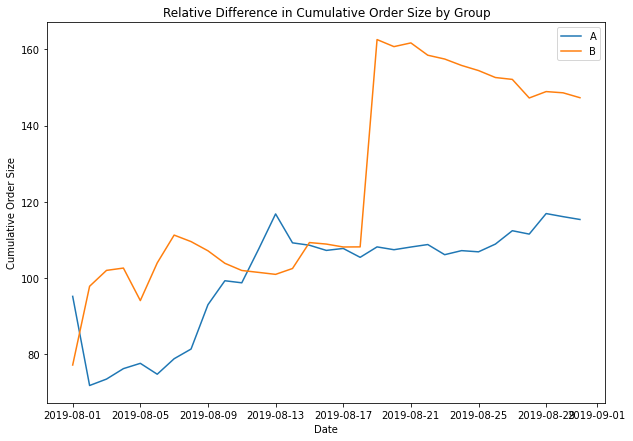

In [21]:
# graphing cumulative revenue difference

plt.figure(figsize = (10,7))
plt.plot(orders_agg_a['date'], orders_agg_a['cumulative_rev'], label = 'A')
plt.plot(orders_agg_b['date'], orders_agg_b['cumulative_rev'], label = 'B')
plt.title('Relative Difference in Cumulative Order Size by Group')
plt.ylabel('Cumulative Order Size')
plt.xlabel('Date')
plt.legend()

#### Conclusions

Here we can see that group B's relative cumulative order size was generally higher than that of group A's, though unlike the previous graphs the two groups experieced overlap. The enormous spike in group B is present here, though we can also see a slower spike in group A near the beginning of the month. 

In [22]:
orders_aggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,15,15,1427.4
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,31,31,2224.8
173,2019-08-02,B,42,41,4108.0
291,2019-08-03,A,55,55,4040.0


In [23]:
visits_df.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [24]:
# aggregated visits df

visits_aggregated = visits_df.apply(
    lambda x: visits_df[np.logical_and(visits_df['date'] <= x['date'], visits_df['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1
).sort_values(by=['date','group'])

visits_aggregated.head()

,date,group,visits
0,2019-08-01,A,719
31,2019-08-01,B,713
1,2019-08-02,A,1338
32,2019-08-02,B,1294
2,2019-08-03,A,1845


In [25]:
# merge columns
cumulative_data = orders_aggregated.merge(visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# rename columns
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [26]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,15,15,1427.4,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,31,31,2224.8,1338
3,2019-08-02,B,42,41,4108.0,1294
4,2019-08-03,A,55,55,4040.0,1845


In [27]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

In [28]:
# split df in to cumulative orders + cumulative revenue by group + day

cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders', 'conversion']]
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders', 'conversion']]

In [29]:
# merge dataframes

merged_cumulative_revenue = cumulative_revenue_A.merge(
    cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

In [30]:
merged_cumulative_revenue.head()

,date,revenueA,ordersA,conversionA,revenueB,ordersB,conversionB
0,2019-08-01,1427.4,15,0.020862,1620.0,21,0.029453
1,2019-08-02,2224.8,31,0.023169,4108.0,42,0.032457
2,2019-08-03,4040.0,55,0.029810,5914.8,58,0.032169
3,2019-08-04,5105.1,67,0.026151,7386.3,72,0.027983
4,2019-08-05,6982.7,90,0.027125,8841.1,94,0.028659


Text(0.5, 0, 'Date')

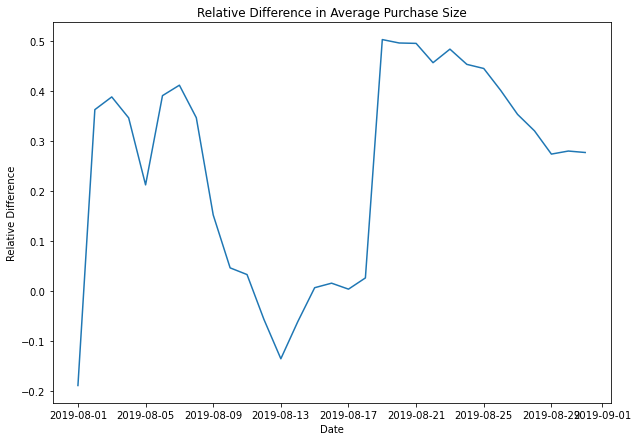

In [31]:
# plotting a relative difference graph for the average purchase sizes
plt.figure(figsize = (10,7))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.title('Relative Difference in Average Purchase Size')
plt.ylabel('Relative Difference')
plt.xlabel('Date')
# adding the X axis

#### Conclusions

The relative difference in average purchase size between group A and B flucuated wildly throughout the month, with very high reflative difference appearing at the beginning and end of the month but very little relative difference near the middle of the month. The large spike near the end of the month can be attributed to the outlier order placed in group B around August 19th. 

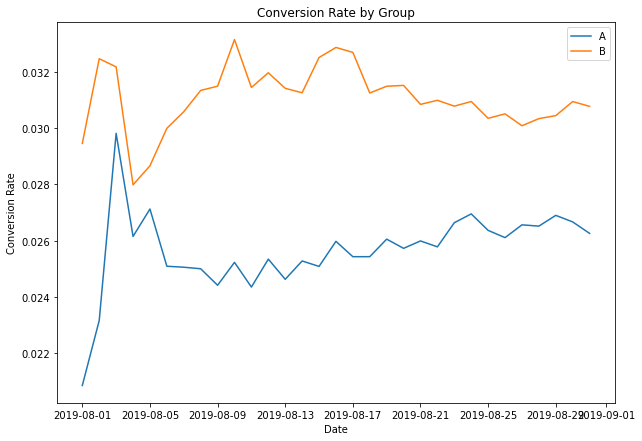

In [32]:
# graphing conversion rate

plt.figure(figsize = (10,7))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['conversion'], label = 'A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['conversion'], label = 'B')
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Date')
plt.legend()

#### Conclusions

Here we can see that group B had a much higher conversion rate than group A, though both groups followed generally similar patterns across the month. Both groups experienced a spike at the beginning of the month, followed by a drop off. Interestingly, following the drop group A experieced a very gradual rise in converison rate over the rest of the month where as group had higher rises but also began to dip near the end of the month. 

In [33]:
user_orders = orders_df.groupby('visitorId').agg({'transactionId':'count'}).reset_index()
user_orders.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [34]:
user_orders = user_orders.sort_values(by = 'transactionId', ascending = True)

In [35]:
user_orders.head()

,visitorId,transactionId
0,5114589,1
639,2735494018,1
640,2736682487,1
641,2738601405,1
642,2743474511,1


Text(0.5, 0, 'Order Total')

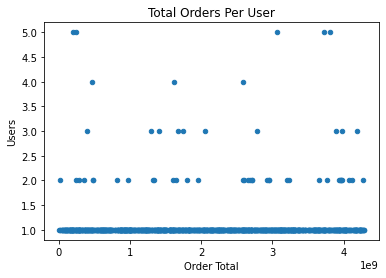

In [36]:
# scatter plot of total orders per user

user_orders.plot(kind = 'scatter', x = 'visitorId', y = 'transactionId')
plt.title('Total Orders Per User')
plt.ylabel('Users')
plt.xlabel('Order Total')

#### Conclusions

Here we can see that the vast majority of users made 1 purchase during the window of this dataset, though it was not uncommon for a user to make 2 orders. Some outliers made up to 5 orders in the month of August. Investigating what caused users to make more than one purchase in the course of the month would be very useful in increasing the average number of orders a user makes.  

In [37]:
# 95 & 99 percentile of total user orders

np.percentile(orders_df.groupby('visitorId').agg({'transactionId':'count'}), [95,99])

array([2., 3.])

#### Conclusions

This shows us that only 5% of users made 2 orders and only 1% made 3 orders. This means that 95% of users only make 1 order. Focusing on ways to increase repeat orders could be extremely useful for increasing revenue. 

Text(0.5, 0, 'Transactions')

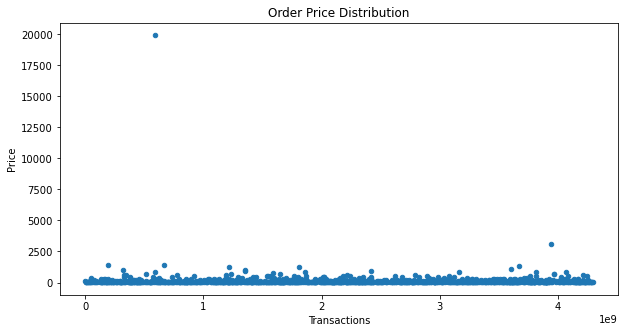

In [38]:
# scatter plot of order price distribution

orders_df.plot(kind = 'scatter', x = 'transactionId', y = 'revenue', figsize = (10,5))
plt.title('Order Price Distribution')
plt.ylabel('Price')
plt.xlabel('Transactions')

Text(0.5, 0, 'Transactions')

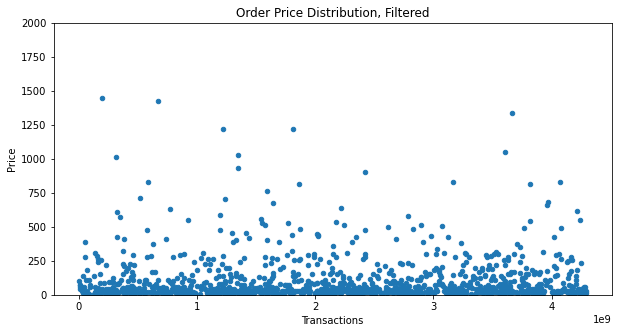

In [39]:
# scatter plot of order price distribution without outliers

orders_df.plot(kind = 'scatter', x = 'transactionId', y = 'revenue', figsize = (10,5))
plt.ylim(0,2000)
plt.title('Order Price Distribution, Filtered')
plt.ylabel('Price')
plt.xlabel('Transactions')

#### Conclusions

Here we can see that the majority of orders were in the same general area between 0 and 2500. There were two outliers however, 1 at just under 5000, and an extreme outlier at 20,000. This graph makes it very clear that users make orders of a fairly consistent size and utilitizing this information to increasingly that size may be helpful to increase revenue.

In [40]:
# 95 & 99 percentile of revenue per order

np.percentile(orders_df['revenue'], [95,99])

array([437.275, 912.334])

#### Conclusions

Now we can see exactly what the order price percentiles are; 5% of users make orders over $437 and 1% make orders over $912, a fact that was harder to see in the above scatter plot because of the outliers. Thus, everything above the 5th percentile is an anomaly. 

### A/B Analysis - Raw vs. Filtered Data

Now that I have completed my data visualizations and determined the outliers in my datasets I can move to the actual A/B testing. To see the difference the data anomalies cause I will perform the A/B tests using the current raw data and then redo the tests after removing the outliers.

In [41]:
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [42]:
visits_df.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Testing Hypotheses 

I will be testing the following hypotheses on both the raw and filtered data, they are:

**Test 1** (Raw & Filtered)

**H0:** There is no significant difference in each group's conversion rates

**H1:** There is a statistically significant difference in each group's conversion rate

**Test 2** (Raw & Filtered)

**H0:** There is no significant difference in each group's order size

**H1:** There is a statistically significant difference in each group's order size

I elected to use the Wilcoxon-Mann-Whitney Nonparametric Test for this because it is best for handling datasets with extreme outliers like those we see in group B's data.

An alpha level of .05 (5%) is chosen because it best mitigates the possibilites of false positives or negatives.

In [43]:
# finding the statistical difference in conversion between groups with raw data

groupA_orders = orders_df[orders_df['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId':pd.Series.nunique})
groupA_orders.columns = ['visitorId', 'orders']

groupB_orders = orders_df[orders_df['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId':pd.Series.nunique})
groupB_orders.columns = ['visitorId', 'orders']

In [44]:
sampleA = pd.concat([groupA_orders['orders'], pd.Series(0, index = np.arange(visits_df[visits_df['group'] == 'A']['visits'].sum()- len(groupA_orders['orders'])), name = 'orders')], axis = 0)
sampleB = pd.concat([groupB_orders['orders'], pd.Series(0, index = np.arange(visits_df[visits_df['group'] == 'B']['visits'].sum()- len(groupB_orders['orders'])), name = 'orders')], axis = 0)                                                    

In [45]:
print("{0:.5f}".format(st.mannwhitneyu(sampleA,sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.01421
0.172


#### Conclusions

Given that the p-value is below .05 we must reject the null hypotheses and conclude that the two group have statistically signifcant differences in conversion rates. The conversion rate for group B compared to group A is 17.2%.

In [46]:
# calculating the statistical signifigance of the difference in order sizes by group

print('{0:.3f}'.format(st.mannwhitneyu(orders_df[orders_df['group'] == 'A']['revenue'], orders_df[orders_df['group'] == 'B']['revenue'])[1]))
print('{0:.3f}'.format(orders_df[orders_df['group'] == 'B']['revenue'].mean()/orders_df[orders_df['group'] == 'A']['revenue'].mean()-1))

0.887
0.277


#### Conclusions

Here the p-value is much higher than .05 meaning that there are no statistically significant differences between the order sizes of group A and group B. However, the relative difference in order size is a fairly signifcant 27.7%.

In [47]:
# finding anomalous users 

too_many_orders = pd.concat([groupA_orders[groupA_orders['orders'] >= 3]['visitorId'], groupB_orders[groupB_orders['orders'] >= 3]['visitorId']], axis = 0)

too_expensive_orders = orders_df[orders_df['revenue'] > 600]['visitorId']

anomalous_users = pd.concat([too_many_orders, too_expensive_orders], axis = 0).drop_duplicates().sort_values()

anomalous_users.head()

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
Name: visitorId, dtype: int64

In [48]:
# removing anomalous users to test conversion rate

sampleA_filtered = pd.concat(
    [groupA_orders[np.logical_not(groupA_orders['visitorId'].isin(anomalous_users))]
    ['orders'], pd.Series(0, index = np.arange(visits_df[visits_df['group'] == 'A']
    ['visits'].sum() - len(groupA_orders['orders'])), name = 'orders')], axis = 0)

sampleB_filtered = pd.concat(
    [groupB_orders[np.logical_not(groupB_orders['visitorId'].isin(anomalous_users))]
    ['orders'], pd.Series(0, index = np.arange(visits_df[visits_df['group'] == 'B']
    ['visits'].sum() - len(groupB_orders['orders'])), name = 'orders')], axis = 0)

In [49]:
print('{0:.5f}'.format(st.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]))
print('{0:.3f}'.format(sampleB_filtered.mean()/sampleA_filtered.mean()-1))

0.00921
0.180


#### Conclusions

The filtered data had the same outcome as the raw data, group B had a much better conversion rate than group A at a flat 18%. 

In [50]:
# removing anomalous users to test order size 

print('{0:.3f}'.format(st.mannwhitneyu(
    orders_df[np.logical_and(
        orders_df['group'] == 'A',
        np.logical_not(orders_df['visitorId'].isin(anomalous_users)))]['revenue'],
    orders_df[np.logical_and(
    orders_df['group'] == 'B',
    np.logical_not(orders_df['visitorId'].isin(anomalous_users)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders_df[np.logical_and(orders_df['group'] == 'B',
    np.logical_not(orders_df['visitorId'].isin(anomalous_users)))]['revenue'].mean()/orders_df[np.logical_and(
        orders_df['group'] == 'A',
        np.logical_not(orders_df['visitorId'].isin(anomalous_users)))]['revenue'].mean() -1))

0.820
0.074


#### Conclusions

After removing the outliers from groups A and B there was an even smaller difference in order size between the two groups shows that there is no signifcant difference between them. After removing the outliers however the relative difference dropped from 27.7% to 7.4%.

## Conclusion & Decisions

Now that the A/B testing of both the raw and filtered data is concluded I have to make a decision about how to proceed. 

**Visualizations**

As we saw across all the visualizations, group B performed better than group A in every category; group B's cumulative revenue and conversion rate were both higher than group A's even after discounting outliers. Both groups had very similar order sizes.

It is clear that the average user makes 1 - 2 purchases a month and generates under $250 in revenue, though many users generate more revenue than that. 

**A/B Analysis**

After examining both the raw and filtered data I have reached two conclusions;

1. Group B had greater conversion rate than Group A to a statistically significant degree
2. Group A and Group B did not have a statisitically significant difference in order size. 

Given these facts, in concert with group B's higher cumulative revenue, my recommendation would be to conclude the test and declare Group B the leader. 